In [2]:
import cv2
import os
import glob
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
import itertools
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

In [3]:
def extractData(img_dir):
    data_path = os.path.join(img_dir,'*.jpg')
    files = glob.glob(data_path)
    data = []
    labels = []
    for f1 in files:
        a = str(f1).split('.')
        b = str(a[1]).split('/')
        c = str(b[-1]).split('_')
        labels.append(int(str(c[0])))
        img = cv2.imread(f1,0)
        img = cv2.resize(img, (64,64), interpolation = cv2.INTER_AREA) 
        data.append(img)
    labels = np.array(labels)
    return data, labels

def PCA_Manual(origData, pcaN):
    dataMean = np.mean(origData.T, axis=1)
    dataStd = origData - dataMean
    dataCov = np.cov(dataStd.T)
    values, vectors = eig(dataCov)
    indEig = values.argsort()[(-1*pcaN):][::-1]
    vectors = vectors[:,indEig]
    dataPCA = np.dot(dataStd, vectors)
    resData = np.dot(dataPCA, vectors.T) + dataMean
    return dataPCA, resData

def stats(origData, resData):
    diff = np.sum((origData-resData), axis=1)
    MSE = np.mean(diff**2)
    print ("Mean squared error", MSE)
    return MSE

In [4]:
origImg, labels = extractData("./dataset/")
labelsUNQ = np.unique(labels)
origData = np.array(origImg)
origData = origData.reshape(origData.shape[0], origData.shape[1]*origData.shape[2]) 
colors = cm.rainbow(np.linspace(0, 1, len(labelsUNQ)))

/home/subbu/.local/lib/python3.5/site-packages/numpy/core/_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


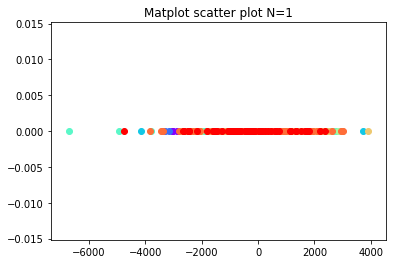

In [5]:
pcaData1, resData1 = PCA_Manual(origData, 1)
data1 = np.c_[ labels, pcaData1 ]
data1 = data1[data1[:,0].argsort()]
data1 = np.split(data1, np.where(np.diff(data1[:,0]))[0]+1)
for y, c in zip(data1, colors):
    plt.scatter(y[:,1], np.zeros(len(y[:,1])), color=c)
plt.title('Matplot scatter plot N=1')
plt.show()

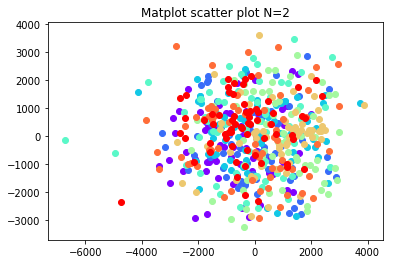

In [6]:
pcaData2, resData2 = PCA_Manual(origData, 2)
data2 = np.c_[ labels, pcaData2 ]
data2 = data2[data2[:,0].argsort()]
data2 = np.split(data2, np.where(np.diff(data2[:,0]))[0]+1)
for y, c in zip(data2, colors):
    plt.scatter(y[:,1], y[:,2], color=c)
plt.title('Matplot scatter plot N=2')
plt.show()

/home/subbu/.local/lib/python3.5/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


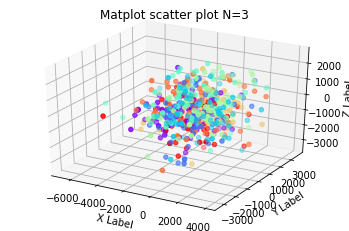

In [7]:
pcaData3, resData3 = PCA_Manual(origData, 3)
data3 = np.c_[ labels, pcaData3 ]
data3 = data3[data3[:,0].argsort()]
data3 = np.split(data3, np.where(np.diff(data3[:,0]))[0]+1)
data3 = np.array(data3)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for y, c in zip(data3, colors):
    ax.scatter(np.asarray(y[:,1], dtype = "float"),np.asarray(y[:,2], dtype = "float"),np.asarray(y[:,3], dtype = "float"),color=c)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.title('Matplot scatter plot N=3')
plt.show()

In [8]:
origImg, labels = extractData("./dataset/")
origData = np.array(origImg)
origData = origData.reshape(origData.shape[0], origData.shape[1]*origData.shape[2]) 
x = np.array([10,50, 75, 100, 150, 250, 500, 1000])
y = np.zeros(len(x))
for i in range(len(x)):
    pcaData, resData = PCA_Manual(origData, x[i])
    y[i] = stats(origData, resData)

Mean squared error (1285264.1829984083+0j)


/home/subbu/.local/lib/python3.5/site-packages/ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  


Mean squared error (56276.35237926825+0j)
Mean squared error (23446.811254730113+0j)
Mean squared error (11480.351008788228+0j)
Mean squared error (4025.4537177252514+0j)
Mean squared error (886.4109211780454+0j)
Mean squared error (15.790272586844658+0j)
Mean squared error (3.522492085531408e-21-1.304488552088808e-39j)


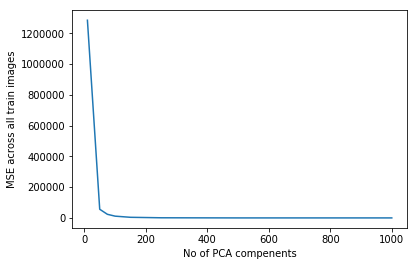

In [9]:
plt.plot(x,y)
plt.ylabel('MSE across all train images')
plt.xlabel('No of PCA compenents')
plt.show()

N = 250 is chosen as the best case scenario for PCA number of components.

In [10]:
print("PCA N=250\n")
origImg, labels = extractData("./dataset/")
origData = np.array(origImg)
origData = origData.reshape(origData.shape[0], origData.shape[1]*origData.shape[2]) 
pcaData, resData = PCA_Manual(origData, 250)
MSE = stats(origData, resData)

resImg = resData.reshape(resData.shape[0],64,64)
resImg = np.array(resImg, dtype = np.uint8)

PCA N=250

Mean squared error (886.4109211780454+0j)


/home/subbu/.local/lib/python3.5/site-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


Original vs Reconstructed image

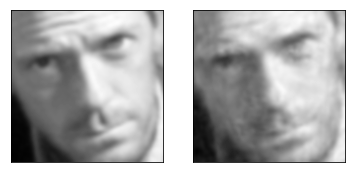

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(origImg[0], cmap = 'gray', interpolation = 'bicubic')
ax1.set_xticks([])
ax1.set_yticks([])
ax2.imshow(resImg[0], cmap = 'gray', interpolation = 'bicubic')
ax2.set_xticks([])
ax2.set_yticks([])
plt.show()

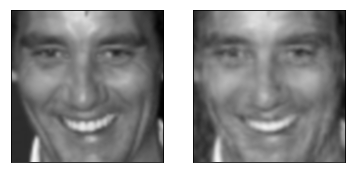

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(origImg[1], cmap = 'gray', interpolation = 'bicubic')
ax1.set_xticks([])
ax1.set_yticks([])
ax2.imshow(resImg[1], cmap = 'gray', interpolation = 'bicubic')
ax2.set_xticks([])
ax2.set_yticks([])
plt.show()